In [1]:
from __future__ import print_function, division
from builtins import range, input

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [3]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from glob import glob


In [5]:
IMAGE_SIZE = [100, 100] 

In [6]:
# training config:
epochs = 5
batch_size = 32

In [63]:
datapath = r"C:\Users\Asus\Desktop\data"
outputModel = './Video_Classfication_Model_VG16/videoClassificationModel'
outputLabelBinarizer = './modelVG16/VideoClassificationBinarizer'

In [9]:
datapath

'C:\\Users\\Asus\\Desktop\\data'

In [10]:
train_path = 'C:\\Users\\Asus\\Desktop\\data\\train'
test_path = 'C:\\Users\\Asus\\Desktop\\data\\test'

In [11]:
train_path

'C:\\Users\\Asus\\Desktop\\data\\train'

In [12]:
test_path

'C:\\Users\\Asus\\Desktop\\data\\test'

In [15]:
image_files = glob(train_path + '/*/*.jp*g')

In [17]:
image_files2 = glob(train_path + '/*/*.png')

In [16]:
len(image_files)

7767

In [18]:
len(image_files2)

46

In [19]:
7767+46

7813

In [20]:
valid_image_files = glob(test_path + '/*/*.jp*g')

In [21]:
valid_image_files2 = glob(test_path + '/*/*.png')

In [23]:
len(valid_image_files2)

0

In [24]:
len(valid_image_files)

72

In [25]:
72+0

72

In [26]:
total_valid_image_files = 72;
total_image_files = 7813

In [28]:
total_valid_image_files

72

In [29]:
# useful for getting number of classes
folders = glob(train_path + '/*')

In [30]:
folders

['C:\\Users\\Asus\\Desktop\\data\\train\\swimming',
 'C:\\Users\\Asus\\Desktop\\data\\train\\table_tennis',
 'C:\\Users\\Asus\\Desktop\\data\\train\\violence']

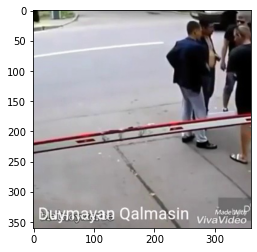

In [31]:
# look at an image for fun
plt.imshow(image.img_to_array(image.load_img(np.random.choice(image_files))).astype('uint8'))
plt.show()

In [32]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 43s 1us/step


In [33]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [34]:
x = Flatten()(vgg.output)
x = Dense(170, activation='relu')(x)
x= Dense(175,activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [35]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [36]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [37]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)

In [38]:
# create an instance of ImageDataGenerator
gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input
)

In [39]:
test_gen = gen.flow_from_directory(test_path, target_size=IMAGE_SIZE)

Found 72 images belonging to 3 classes.


In [40]:
print(test_gen.class_indices)

{'swimming': 0, 'table_tennis': 1, 'violence': 2}


In [41]:
labels = [None] * len(test_gen.class_indices)

In [42]:
labels

[None, None, None]

In [43]:
for k, v in test_gen.class_indices.items():
    labels[v] = k

In [44]:
labels

['swimming', 'table_tennis', 'violence']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


min: -116.23729 max: 149.03174


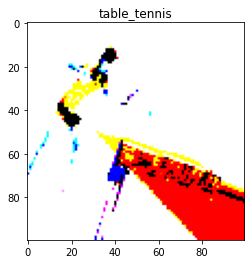

In [45]:
for x, y in test_gen:
    print("min:", x[0].min(), "max:", x[0].max())
    plt.title(labels[np.argmax(y[0])])
    plt.imshow(x[0])
    plt.show()
    break

In [46]:
# create generators
train_generator = gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)

Found 7813 images belonging to 3 classes.


In [48]:
valid_generator = gen.flow_from_directory(
  test_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)

Found 72 images belonging to 3 classes.


In [50]:
r = model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  steps_per_epoch=total_image_files // batch_size,
  validation_steps=total_valid_image_files // batch_size,
)

<ipython-input-50-37bc02f946a2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
244/244 [==============================] - 432s 2s/step - loss: 1.0057 - accuracy: 0.8710 - val_loss: 0.4924 - val_accuracy: 0.8438
Epoch 2/5
244/244 [==============================] - 452s 2s/step - loss: 0.3779 - accuracy: 0.9198 - val_loss: 1.0178 - val_accuracy: 0.9062
Epoch 3/5
244/244 [==============================] - 432s 2s/step - loss: 0.3218 - accuracy: 0.9293 - val_loss: 0.4605 - val_accuracy: 0.8750
Epoch 4/5
244/244 [==============================] - 442s 2s/step - loss: 0.2747 - accuracy: 0.9404 - val_loss: 0.3668 - val_accuracy: 0.9062
Epoch 5/5
244/244 [==============================] - 451s 2s/step - loss: 0.2501 - accuracy: 0.9460 - val_loss: 0.7202 - val_accuracy: 0.9375


In [52]:
def get_confusion_matrix(data_path, N):
  # we need to see the data in the same order
  # for both predictions and targets
    print("Generating confusion matrix", N)
    predictions = []
    targets = []
    i = 0
    for x, y in gen.flow_from_directory(data_path, target_size=IMAGE_SIZE, shuffle=False, batch_size=batch_size * 2):
        
        i += 1
        if i % 50 == 0:
            print(i)
        p = model.predict(x)
        p = np.argmax(p, axis=1)
        y = np.argmax(y, axis=1)
        predictions = np.concatenate((predictions, p))
        targets = np.concatenate((targets, y))
        if len(targets) >= N:
            break

    cm = confusion_matrix(targets, predictions)
    return cm


cm = get_confusion_matrix(train_path, len(image_files))
print(cm)
valid_cm = get_confusion_matrix(test_path, len(valid_image_files))
print(valid_cm)

Generating confusion matrix 7767
Found 7813 images belonging to 3 classes.
50
100
[[ 960   26   26]
 [  26  824  143]
 [  26   53 5724]]
Generating confusion matrix 72
Found 72 images belonging to 3 classes.
[[23  0  1]
 [ 0 16  8]
 [ 0  0 24]]


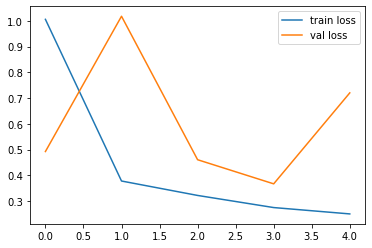

In [53]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

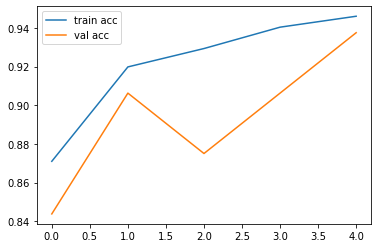

In [54]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [64]:
model.save('vg16model.h5')

In [66]:
import pickle

In [68]:
lbinarizer = open('./modelVG16/VideoClassificationBinarizer.pickle','wb')
lbinarizer.write(pickle.dumps(labels))
lbinarizer.close()